In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
# Loading necessary datasets 
ccass = pd.read_csv('ccass.csv')
ohlc = pd.read_csv('ohlc.csv')

In [3]:
# Presenting original structure of ccass.csv
ccass

,obs,ccass_id,name,share,percent
0,1,C00019,香港上海匯豐銀行有限公司,1308006446,12.37
1,1,C00010,CITIBANK NA,358651867,3.39
2,1,C00100,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",348576653,3.29
3,1,C00033,中國銀行(香港)有限公司,316393266,2.99
4,1,C00018,恒生銀行有限公司,120755945,1.14
...,...,...,...,...,...
291377,738,B02002,新城晉峰證券有限公司,500,0.00
291378,738,B02009,金裕富證券有限公司,500,0.00
291379,738,B02047,艾德證券期貨有限公司,500,0.00
291380,738,B02056,瑞邦證券有限公司,500,0.00


In [4]:
# Preseting basic information of CCASS dataset
ccass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291382 entries, 0 to 291381
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   obs       291382 non-null  int64  
 1   ccass_id  291382 non-null  object 
 2   name      291382 non-null  object 
 3   share     291382 non-null  int64  
 4   percent   291382 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 11.1+ MB


In [5]:
# Printing the summary statistics of ccass
print('Summary Statistics of CCASS Data:')
ccass.describe()

Summary Statistics of CCASS Data:


,obs,share,percent
count,291382.000000,2.913820e+05,291382.000000
mean,357.991063,8.573218e+06,0.079192
std,212.300764,7.524886e+07,0.711374
min,1.000000,1.000000e+00,0.000000
25%,173.000000,1.400000e+04,0.000000
50%,353.000000,8.550000e+04,0.000000
75%,539.000000,4.686440e+05,0.000000
max,738.000000,1.649186e+09,15.590000


In [6]:
# Doing the same procedures with OHLC Data
ohlc

,obs,open_stock,high_stock,low_stock,close_stock,volume_stock,open_hsi,high_hsi,low_hsi,close_hsi,volume_hsi
0,1,23.95,24.00,23.20,23.65,11560500,23782.85938,23888.36914,23175.36914,23475.25977,3344858000
1,2,23.60,24.05,23.50,23.85,6040500,23595.57031,23864.30078,23537.65039,23658.91992,2118634900
2,3,23.70,24.00,23.60,23.90,6858500,23524.05078,23807.00000,23517.51953,23788.92969,2328241400
3,4,23.90,24.35,23.60,24.20,5462500,23675.25977,23802.76953,23451.92969,23766.68945,2717889700
4,5,24.25,24.80,24.15,24.70,10269500,23420.43945,23628.30078,23314.97070,23349.38086,2357402800
...,...,...,...,...,...,...,...,...,...,...,...
733,734,25.20,25.25,24.05,24.15,16765500,19307.33984,19351.06055,19102.06055,19150.99023,4385600000
734,735,24.15,24.40,24.05,24.15,11283500,19054.40039,19295.75000,19054.40039,19159.19922,2384700000
735,736,24.25,24.50,24.10,24.35,7490500,19187.05078,19660.99023,19061.59961,19603.13086,2374800000
736,737,24.30,24.40,24.20,24.35,3786000,19558.17969,19558.17969,19312.25977,19366.96094,2160800000


In [7]:
ohlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   obs           738 non-null    int64  
 1   open_stock    738 non-null    float64
 2   high_stock    738 non-null    float64
 3   low_stock     738 non-null    float64
 4   close_stock   738 non-null    float64
 5   volume_stock  738 non-null    int64  
 6   open_hsi      738 non-null    float64
 7   high_hsi      738 non-null    float64
 8   low_hsi       738 non-null    float64
 9   close_hsi     738 non-null    float64
 10  volume_hsi    738 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 63.6 KB


In [8]:
print('Summary Statistics of OHLC Data')
ohlc.describe()

Summary Statistics of OHLC Data


,obs,open_stock,high_stock,low_stock,close_stock,volume_stock,open_hsi,high_hsi,low_hsi,close_hsi,volume_hsi
count,738.000000,738.000000,738.000000,738.000000,738.000000,7.380000e+02,738.000000,738.000000,738.000000,738.000000,7.380000e+02
mean,369.500000,24.900705,25.158184,24.627168,24.883320,8.443137e+06,19263.179341,19432.435582,19080.133641,19256.353735,2.544291e+09
std,213.186538,3.058411,3.099355,2.996263,3.056737,5.229050e+06,2211.130907,2211.426405,2183.166565,2206.549173,1.015228e+09
min,1.000000,18.060000,18.580000,17.860000,18.020000,1.054000e+06,14830.690430,15113.150390,14597.309570,14687.019530,0.000000e+00
25%,185.250000,22.700000,22.900000,22.512500,22.700000,5.113125e+06,17561.364747,17674.279297,17381.941892,17523.375490,1.937923e+09
50%,369.500000,24.750000,25.000000,24.500000,24.750000,7.067750e+06,19226.549805,19378.294920,19068.714845,19223.159180,2.355145e+09
75%,553.750000,26.900000,27.200000,26.600000,26.937500,9.966875e+06,20626.912597,20791.947270,20409.624510,20631.153320,2.886521e+09
max,738.000000,32.450000,32.750000,32.050000,32.500000,5.053150e+07,25050.589840,25050.589840,24732.650390,24965.550780,1.125790e+10


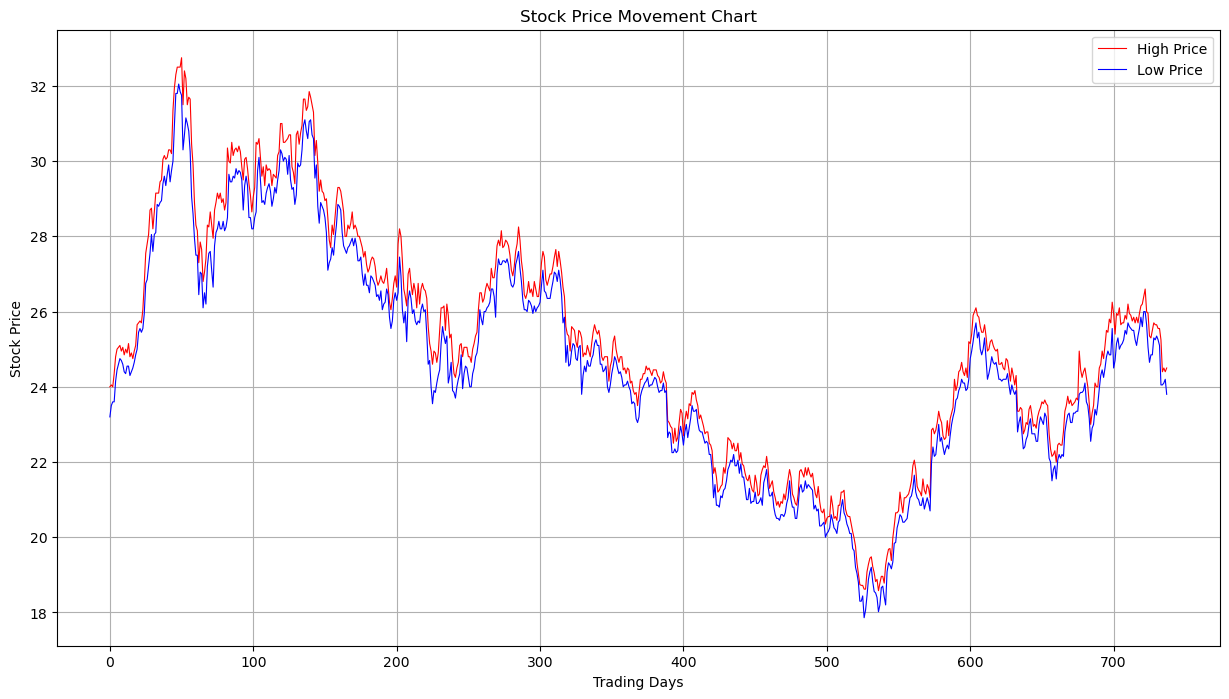

In [9]:
# Plotting the high price movement
plt.figure(figsize=(15, 8))  # Set the figure size
plt.plot(ohlc['high_stock'], color='red', label='High Price', linewidth=0.8)
plt.plot(ohlc['low_stock'], color='blue', label='Low Price', linewidth=0.8)

# Adding titles and labels
plt.title('Stock Price Movement Chart')
plt.xlabel('Trading Days')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

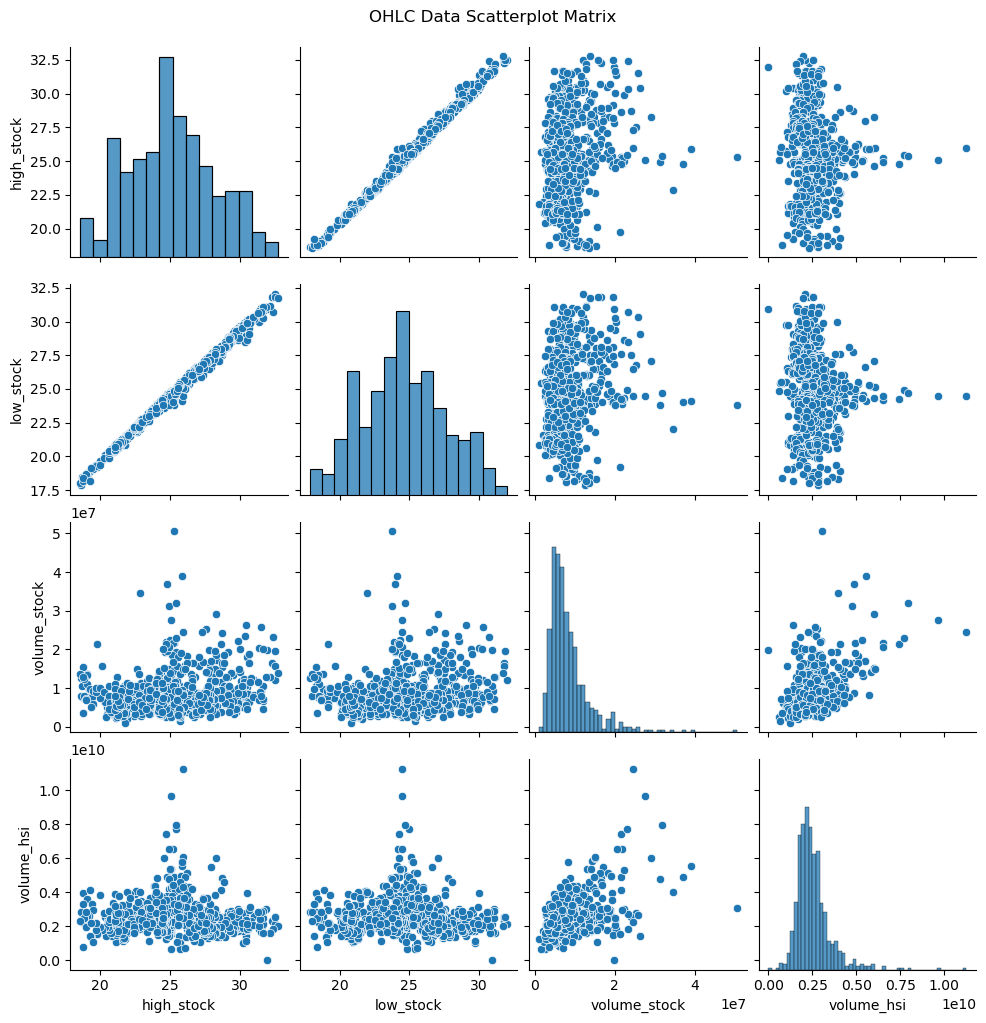

In [10]:
features_toplot = ohlc[['high_stock', 'low_stock', 'volume_stock', 'volume_hsi']]
sns.pairplot(features_toplot)
plt.suptitle('OHLC Data Scatterplot Matrix', y = 1.02)
plt.show()

In [11]:
# Data preprocessing and Feature engineering in CCASS data
ccass1 = ccass
ccass1['percent_squared'] = ccass['percent'] ** 2
hhi_df = ccass.groupby('obs')['percent_squared'].sum().reset_index()
hhi_df.rename(columns = {'percent_squared': 'HHI'}, inplace = True)
ccass1 = pd.merge(ccass1, hhi_df, on = 'obs', how = 'left')

In [19]:
ccass_agg = ccass1.groupby('obs').agg({
    'share' : 'sum',
    'percent': 'mean',
    'HHI': 'mean'
}).reset_index()

In [20]:
ccass_agg

,obs,share,percent,HHI
0,1,3372970646,0.071940,189.6257
1,2,3372983646,0.071728,189.1949
2,3,3372984646,0.071563,188.1953
3,4,3372956146,0.071563,188.1559
4,5,3372673646,0.071705,188.1066
...,...,...,...,...
733,734,3387953643,0.087815,266.7593
734,735,3387987004,0.087843,266.6072
735,736,3387853366,0.087270,266.3643
736,737,3387807366,0.087242,265.5942


In [21]:
# Data preprocessing and Feature Engineering in OHLC
ohlc1 = ohlc

In [22]:
# Calculate the price differences
delta = ohlc1['close_stock'].diff()

# Separate gains and losses
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

# Calculate the Relative Strength (RS)
rs = gain / loss

# Calculate the RSI
ohlc1['RSI'] = 100 - (100 / (1 + rs))

In [23]:
ohlc1['ma20_stock'] = ohlc['close_stock'].rolling(window = 20).mean()

In [24]:
ohlc1['rolling_std_20'] = ohlc['close_stock'].rolling(window = 20).std()

In [25]:
ohlc1['ma20_hsi'] = ohlc['close_hsi'].rolling(window = 20).mean()

In [26]:
merged_df = pd.merge(ohlc1, ccass_agg, on = 'obs', how = 'left')
merged_df.dropna(inplace = True)
merged_df

,obs,open_stock,high_stock,low_stock,close_stock,volume_stock,open_hsi,high_hsi,low_hsi,close_hsi,volume_hsi,RSI,ma20_stock,rolling_std_20,ma20_hsi,share,percent,HHI
19,20,25.05,25.65,25.00,25.50,10729500,23282.34961,23319.43945,23099.48047,23280.56055,1433026700,63.636364,24.6450,0.442154,23523.309475,3372953977,0.071755,190.5553
20,21,25.60,25.70,25.45,25.60,6084500,23253.98047,23253.98047,23008.27930,23086.53906,828414400,66.666667,24.7425,0.425897,23503.873439,3373028977,0.071567,190.9864
21,22,25.65,25.75,25.55,25.60,4577500,23130.44922,23248.25977,22990.24023,23112.00977,1008366000,65.909091,24.8300,0.412438,23476.527932,3373048977,0.071968,191.7361
22,23,25.60,25.70,25.45,25.50,1577000,23553.78906,23590.11914,23394.76953,23397.66992,675936400,67.441860,24.9100,0.376130,23456.964943,3373062477,0.071968,191.7361
23,24,25.60,26.05,25.55,25.95,7136500,23510.53906,23605.02930,23193.18945,23274.75000,734331100,73.076923,24.9975,0.404734,23432.367971,3373045477,0.071778,191.9654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,734,25.20,25.25,24.05,24.15,16765500,19307.33984,19351.06055,19102.06055,19150.99023,4385600000,21.739130,25.4750,0.462971,20079.335548,3387953643,0.087815,266.7593
734,735,24.15,24.40,24.05,24.15,11283500,19054.40039,19295.75000,19054.40039,19159.19922,2384700000,22.727273,25.4075,0.549467,20002.238477,3387987004,0.087843,266.6072
735,736,24.25,24.50,24.10,24.35,7490500,19187.05078,19660.99023,19061.59961,19603.13086,2374800000,23.880597,25.3550,0.598221,19963.362989,3387853366,0.087270,266.3643
736,737,24.30,24.40,24.20,24.35,3786000,19558.17969,19558.17969,19312.25977,19366.96094,2160800000,24.242424,25.3075,0.639135,19915.844532,3387807366,0.087242,265.5942


In [ ]:
merged_df.to_csv('merged_df.csv', index = False)

In [27]:
# Prepare features and target variables
features = merged_df[['ma20_hsi', 'ma20_stock', 'volume_stock', 'RSI', 'close_hsi', 'share', 'rolling_std_20', 'volume_hsi', 'HHI', 'percent']].copy()
target_high = merged_df['high_stock']
target_low = merged_df['low_stock']

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train_high, y_test_high = train_test_split(features, target_high, test_size = 0.2, random_state = 42)
_, _, y_train_low, y_test_low = train_test_split(features, target_low, test_size = 0.2, random_state = 42)

In [29]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Train Random Forest for feature importance
rf_high = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_high.fit(X_train_scaled, y_train_high)
rf_low = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_low.fit(X_train_scaled, y_train_low)

RandomForestRegressor(random_state=42)

In [31]:
# Feature importance
importance_high = rf_high.feature_importances_
importance_low = rf_low.feature_importances_

In [32]:
importance_high

array([0.00597771, 0.81466837, 0.00239339, 0.0281514 , 0.02027214,
       0.09145228, 0.00470311, 0.00193844, 0.01198504, 0.01845813])

In [33]:
importance_low

array([0.00507003, 0.82633353, 0.00240858, 0.03152293, 0.02162181,
       0.08145038, 0.00509136, 0.0019462 , 0.01103463, 0.01352056])

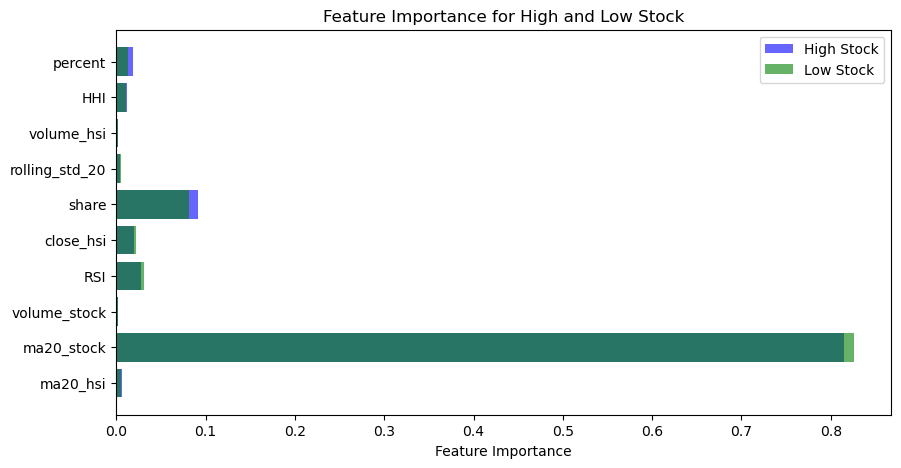

In [34]:
# Plot features importance
features_list = features.columns
plt.figure(figsize = (10, 5))
plt.barh(features_list, importance_high, color = 'blue', alpha = 0.6, label = 'High Stock')
plt.barh(features_list, importance_low, color = 'green', alpha = 0.6, label = 'Low Stock')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for High and Low Stock')
plt.legend()
plt.show()

In [35]:
feat = pd.DataFrame({'features': features_list, 'high': importance_high, 'low': importance_low})

In [36]:
feat['>= 0.01'] = (feat['high'] >= 0.01) & (feat['low'] >= 0.01)
feat

,features,high,low,>= 0.01
0,ma20_hsi,0.005978,0.005070,False
1,ma20_stock,0.814668,0.826334,True
2,volume_stock,0.002393,0.002409,False
3,RSI,0.028151,0.031523,True
4,close_hsi,0.020272,0.021622,True
5,share,0.091452,0.081450,True
6,rolling_std_20,0.004703,0.005091,False
7,volume_hsi,0.001938,0.001946,False
8,HHI,0.011985,0.011035,True
9,percent,0.018458,0.013521,True


In [ ]:
# selected features have its feature importance >= 0.01 for both high and low stock: ma20_stock, RSI, close_hsi, share, HHI, percent

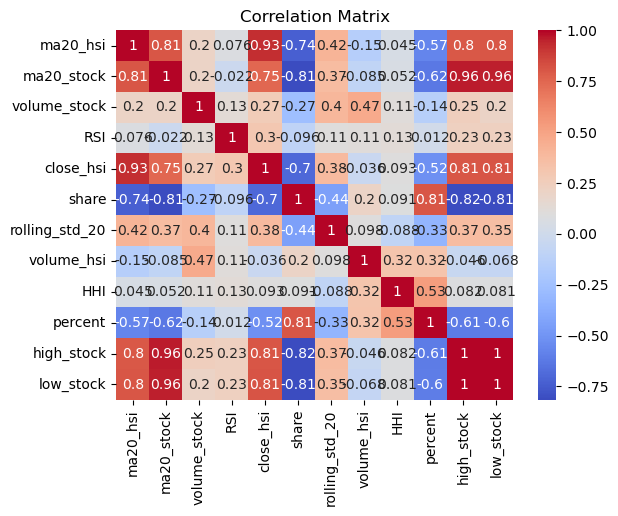

In [87]:
corr_matrix = merged_df[['ma20_hsi', 'ma20_stock', 'volume_stock', 'RSI', 'close_hsi', 'share', 'rolling_std_20', 'volume_hsi', 'HHI', 'percent', 'high_stock', 'low_stock']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [142]:
# Select relevant features
relevant_features = merged_df[['ma20_hsi', 'ma20_stock', 'HHI', 'close_hsi', 'volume_stock', 'RSI', 'share', 'rolling_std_20', 'volume_hsi', 'percent']] 

In [143]:
def create_dataset(X, y, time_step = 60):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

In [144]:
# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(relevant_features)
y_high_scaled = scaler.fit_transform(target_high.values.reshape(-1, 1))
y_low_scaled = scaler.fit_transform(target_low.values.reshape(-1, 1))

In [145]:
# Create LSTM datasets
time_step = 60
X, y_high = create_dataset(X_scaled, y_high_scaled, time_step)
_, y_low = create_dataset(X_scaled, y_low_scaled, time_step)

In [146]:
# Split into train and test datasets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_high_train, y_high_test = y_high[:train_size], y_high[train_size:]
y_low_train, y_low_test = y_low[:train_size], y_low[train_size:]

In [150]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (time_step, X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

C:\Users\Pin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [148]:
# Train the model for high
model.fit(X_train, y_high_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_high_test))

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.1102 - val_loss: 0.0186
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0094 - val_loss: 0.0078
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0048 - val_loss: 0.0092
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0038 - val_loss: 0.0082
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0031 - val_loss: 0.0067
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0028 - val_loss: 0.0058
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0025 - val_loss: 0.0059
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0024 - val_loss: 0.0049
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0023 - val_loss: 0.0049
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0022 - val_loss: 0.0050
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0021 - val_loss: 0.0049
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0

In [149]:
# Make Predictions for high
predictions_high = model.predict(X_test[-10:])
predictions_high = scaler.inverse_transform(predictions_high)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


In [151]:
# for low
model.fit(X_train, y_low_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_low_test))

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 0.1473 - val_loss: 0.0267
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0104 - val_loss: 0.0090
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0049 - val_loss: 0.0064
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0034 - val_loss: 0.0066
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0029 - val_loss: 0.0074
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0026 - val_loss: 0.0071
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0026 - val_loss: 0.0064
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0023 - val_loss: 0.0068
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0023 - val_loss: 0.0040
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.

In [152]:
predictions_low = model.predict(X_test[-10:])
predictions_low = scaler.inverse_transform(predictions_low)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


In [153]:
# Save predictions to csv
predictions_df = pd.DataFrame({
    'obs': range(739, 749),
    'high_stock': predictions_high.flatten(),
    'low_stock': predictions_low.flatten()
})
predictions_df

,obs,high_stock,low_stock
0,739,25.448292,23.809361
1,740,25.444344,23.859564
2,741,25.488142,23.943157
3,742,25.595232,24.068546
4,743,25.614403,24.079565
5,744,25.462284,23.928778
6,745,25.067783,23.579058
7,746,24.713768,23.333261
8,747,24.457100,23.221079
9,748,24.292130,23.211153


In [ ]:
# predictions for the next 10 days
last_sequence = data[-seq_length:].reshape(1, seq_length, X_train.shape[2])
predicted_highs = []
predicted_lows = []

for _ in range (10):
    predictions = model.predict(last_sequence)
    predicted_highs.append(predictions[0][0])
    predicted_lows.append(predictions[0][1])

    # Create a new predicted output with the same shape as last_data, rest of the features will be set to 0
    new_pred = np.zeros((1, 1, X_train.shape[2]))
    new_pred[0, 0, 0] = predictions[0][0]
    new_pred[0, 0, 1] = predictions[0][1]

    # Update last_sequence for the next prediction
    new_seq = np.append(last_sequence[:, 1:, :], new_pred, axis = 1)
    last_sequence = new_seq

In [ ]:
# Inverse transform predictions to original scale
predicted_highs = scaler.inverse_transform(np.column_stack((np.zeros(10), predicted_highs, np.zeros(10), 
                                                            np.zeros(10), np.zeros(10), np.zeros(10), 
                                                            np.zeros(10), np.zeros(10), np.zeros(10))))[:, 1]
predicted_lows = scaler.inverse_transform(np.column_stack((np.zeros(10), predicted_lows, np.zeros(10), 
                                                           np.zeros(10), np.zeros(10), np.zeros(10), 
                                                          np.zeros(10), np.zeros(10), np.zeros(10))))[:, 1]

In [ ]:
pred_df = pd.DataFrame({'obs': range(739, 749), 'high_stock': predicted_highs, 'low_stock': predicted_lows})

In [ ]:
pred_df.to_csv('Stock_10Day.csv', index = False)
print(pred_df)